# E-Commerce Revenue Analysis

## Project Overview
This project analyzes an e-commerce transaction dataset to understand revenue performance, customer behavior, and product performance.

The objective is to extract business insights such as:
- Revenue trends over time
- Geographic revenue distribution
- Customer segmentation and value contribution
- Product performance analysis
- Sales patterns by time

## Dataset Description
The dataset contains transactional data including:
- Invoice number
- Product information
- Quantity and unit price
- Customer ID
- Country
- Transaction date and time

A new Revenue column is created as:

Revenue = Quantity × UnitPrice

This analysis includes data cleaning, exploratory data analysis (EDA), and business-focused insights.

In [364]:
import pandas as pd

!pip install plotly 

import plotly.express as px

import matplotlib.pyplot as plt

df = pd.read_csv("/Users/Sasha/Desktop/data.csv", encoding="latin-1")

## INTRODUCTION:

In [366]:
# Display dataset structure, column data types, and non-null counts to assess data qualityt it. By checking df.info() I check the information regarding the columns. 

df.info()

# Based on the output, I can see that the dataset contains 541,909 rows and 8 columns.
# The data types present in the dataset are integers (int64), floats (float64), and objects (strings).
# The output also shows the number of non-null values for each column, which helps identify missing data.
# For example, the Description and CustomerID columns have missing values.
# This information helps me understand the structure, size, and data quality of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [367]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [368]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [369]:
df.shape

(541909, 8)

In [370]:
df.columns 

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## EDA

In order to start the cleaning I check the columns and I see if things look fine to me. From a first look, I would like to create two extra columns next to InvoiceDate to split the Invoice date by actual date and time. Another thing I want to do is to check which countries are mentioned under column and how they are referred. For instance, Greece could be mentioned as Hellenic Republic, Hellas. 

In [373]:
# Convert InvoiceDate to datetime format to enable time-based feature extraction

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [374]:
# Get the column index of InvoiceDate to insert new derived columns in the same position

pos = df.columns.get_loc("InvoiceDate")

In [375]:
# Extract and insert separate Date and Time columns from InvoiceDate

df.insert(pos, "Date", df["InvoiceDate"].dt.date)
df.insert(pos, "Time", df["InvoiceDate"].dt.time)

In [376]:
# Remove the original InvoiceDate column after extracting Date and Time

df.drop(columns=["InvoiceDate"], inplace=True)

In [377]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [378]:
df['Country'].nunique()

38

In [379]:
# Create a Revenue column by multiplying Quantity and UnitPrice

df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [380]:
# Identify the number of nulls in the dataset

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
Time                0
Date                0
UnitPrice           0
CustomerID     135080
Country             0
Revenue             0
dtype: int64

## EDA Conclusion

The dataset contains over 541,000 transactions across 38 countries and includes detailed information about customers, products, and transaction timing.

The data has been cleaned and prepared by:
- Converting InvoiceDate to datetime format
- Creating separate Date and Time columns
- Creating a Revenue column
- Extracting Hour, DayOfWeek, and Month for time-based analysis

The dataset is now ready for revenue, customer, product, and time-based analysis to generate business insights.

## Category A: Revenue Analysis:

## Key Revenue Metrics Summary

Total Revenue: $9,747,747.93

Average Revenue per Customer: $1,898.46

Average Revenue per Transaction: $376.36

Average Revenue per Day: $31,959.83

Highest Revenue Month: November 2011

Largest Revenue Decline: December 2011

Average Monthly Growth Rate: 2.89%

**i) Overall Revenue KPIs:**

a) What is the revenue generated?

In [386]:
total_revenue = df["Revenue"].sum()

print(f"The total revenue of the company is {total_revenue}")

The total revenue of the company is 9747747.933999998


b) What is the average revenue per customer?

In [388]:
average_revenue_per_customer= df.groupby("CustomerID")["Revenue"].sum().mean()
print(f"The average revenue per customer is {average_revenue_per_customer}")

The average revenue per customer is 1898.4597012808783


c) What is the average revenue per transaction?

In [551]:
df.groupby("InvoiceNo")["Revenue"].sum().mean()

376.3609240926641

d) What is the average revenue per day?

In [392]:
df.groupby("Date")["Revenue"].sum().mean()

31959.82929180328

**ii) Revenue by Geography:**

a) What is the total revenue generated per country?

In [553]:
#To identify the countries that generate the highest total revenue, group the data by country and calculate the sum of TotalRevenue for each country.

df.groupby("Country")["Revenue"].sum()

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

b) What are the top 10 countries in terms of revenue?

In [557]:
top10 = (df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10).reset_index())
top10

,Country,Revenue
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


In [398]:
# To see faster the geographical location of the countries I can map them in plotly. 

fig = px.choropleth(
    top10,
    locations="Country",
    locationmode="country names",   
    color="Revenue",
    hover_name="Country",
    hover_data={"Revenue": ":,.2f"},
    title="Top 10 Countries by Total Revenue"
    )
fig.show()

/var/folders/zz/j3mp1qhj1ql34t8bhkyq9p5m0000gp/T/ipykernel_11299/2713688095.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



As shown in the map, the top 10 countries generating revenue are highlighted. The color intensity represents the amount of revenue generated, with brighter colors indicating higher revenue and darker colors indicating lower revenue among the top-performing countries.

c) What are the bottom 10 countries in terms of revenue?

In [559]:
bottom10= (df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).tail(10).reset_index())
bottom10

,Country,Revenue
0,United Arab Emirates,1902.28
1,USA,1730.92
2,Lebanon,1693.88
3,Lithuania,1661.06
4,European Community,1291.75
5,Brazil,1143.60
6,RSA,1002.31
7,Czech Republic,707.72
8,Bahrain,548.40
9,Saudi Arabia,131.17


In [402]:
#I plot them following the same logic I followed for the top 10

fig = px.choropleth(
    bottom10,
    locations="Country",
    locationmode="country names",   
    color="Revenue",
    hover_name="Country",
    hover_data={"Revenue": ":,.2f"},
    title="Bottom 10 Countries by Total Revenue"
    )
fig.show()

/var/folders/zz/j3mp1qhj1ql34t8bhkyq9p5m0000gp/T/ipykernel_11299/973704629.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



As shown in the map, the lowest 10 countries generating revenue are highlighted. The color intensity represents the amount of revenue generated, with brighter colors indicating higher revenue and darker colors indicating lower revenue among the lowest-performing countries.

**iii) Revenue Over Time**

a) What was the day with the highest revenue?

In [561]:
daily_revenue = df.groupby("Date")["Revenue"].sum()
highest_revenue_date = daily_revenue.idxmax()
highest_revenue_value = daily_revenue.max()

print(f"Highest revenue was generated on {highest_revenue_date} with {highest_revenue_value:,.2f}")

Highest revenue was generated on 2011-11-14 00:00:00 with 112,141.11


b) What was the date with the lowest revenue? 

In [408]:
lowest_revenue_date = daily_revenue.idxmin()
lowest_revenue_value = daily_revenue.min()

print(f"Lowest revenue was generated on {lowest_revenue_date} with {lowest_revenue_value:,.2f}")

Lowest revenue was generated on 2011-01-05 with -1,566.23


c) How does revenue evolve over time?

In [563]:
# Reset index to convert Date from index into a column for easier analysis and visualization

revenue_over_time = df.groupby("Date")["Revenue"].sum().reset_index()

revenue_over_time.head()

,Date,Revenue
0,2010-12-01,58635.56
1,2010-12-02,46207.28
2,2010-12-03,45620.46
3,2010-12-05,31383.95
4,2010-12-06,53860.18


In [411]:
fig = px.line(
    revenue_over_time,
    x="Date",
    y="Revenue",
    title="Revenue Evolution Over Time",
    labels={"TotalRevenue": "Daily Revenue", "Date": "Date"}
)

fig.show()

The revenue trend shows daily fluctuations with an overall upward trajectory, indicating business growth over time. Higher revenue peaks toward the later months suggest increased customer activity, potentially due to seasonal demand or promotional periods.

**iv) Revenue Growth Analysis**

a) What is the total revenue generated each month?

In [565]:
df["Date"] = pd.to_datetime(df["Date"])

monthly_revenue = df.groupby(pd.Grouper(key="Date", freq="M"))["Revenue"].sum().reset_index()

monthly_revenue.rename(columns={"Revenue": "TotalMonthlyRevenue"}, inplace=True)

monthly_revenue

,Date,TotalMonthlyRevenue
0,2010-12-31,748957.020
1,2011-01-31,560000.260
2,2011-02-28,498062.650
3,2011-03-31,683267.080
4,2011-04-30,493207.121
5,2011-05-31,723333.510
6,2011-06-30,691123.120
7,2011-07-31,681300.111
8,2011-08-31,682680.510
9,2011-09-30,1019687.622


b) What is the month-over-month revenue growth rate?

In [567]:
monthly_revenue["MoM_Growth_Rate (%)"] = monthly_revenue["TotalMonthlyRevenue"].pct_change() * 100
monthly_revenue

,Date,TotalMonthlyRevenue,MoM_Growth_Rate (%)
0,2010-12-31,748957.020,NaN
1,2011-01-31,560000.260,-25.229320
2,2011-02-28,498062.650,-11.060282
3,2011-03-31,683267.080,37.184967
4,2011-04-30,493207.121,-27.816350
5,2011-05-31,723333.510,46.659178
6,2011-06-30,691123.120,-4.453048
7,2011-07-31,681300.111,-1.421311
8,2011-08-31,682680.510,0.202612
9,2011-09-30,1019687.622,49.365275


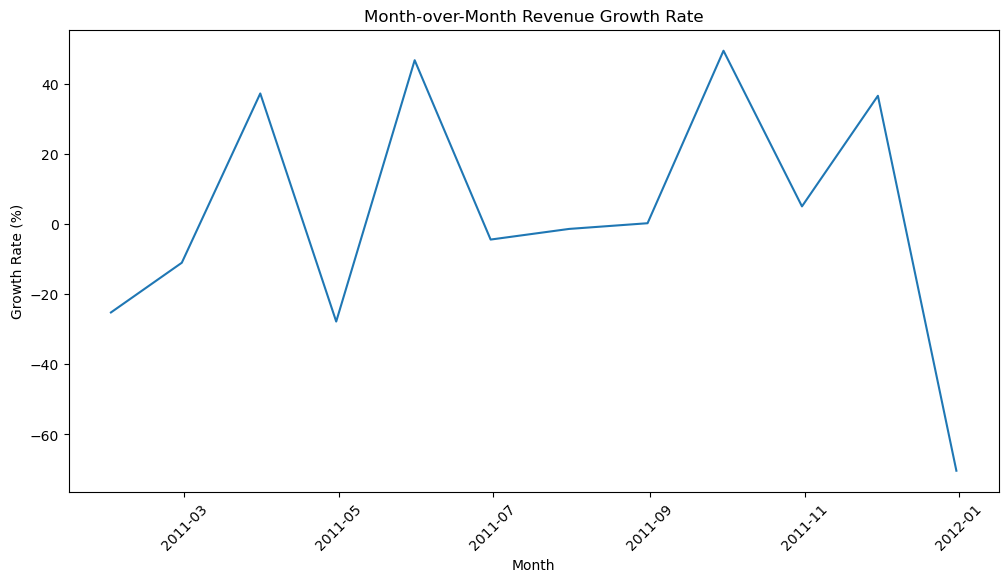

In [418]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue["Date"], monthly_revenue["MoM_Growth_Rate (%)"])
plt.title("Month-over-Month Revenue Growth Rate")
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.show()

The month-over-month revenue growth rate shows significant volatility throughout the period, with alternating phases of strong growth and decline. Revenue increased sharply in several months, indicating periods of strong sales performance, while notable declines suggest potential seasonality or temporary reductions in demand. The sharp drop at the end of the period may reflect incomplete data for the final month rather than an actual performance decline.

c) Which month experienced the highest revenue growth rate?

In [569]:
highest_growth_month = monthly_revenue.loc[
    monthly_revenue["MoM_Growth_Rate (%)"].idxmax()]

highest_growth_month

Date                   2011-09-30 00:00:00
TotalMonthlyRevenue            1019687.622
MoM_Growth_Rate (%)              49.365275
Name: 9, dtype: object

d) Which month experienced the largest revenue decline?

In [571]:
# idxmin() finds the index of the minimum growth rate value
# This identifies the month with the largest revenue decline
largest_decline_month = monthly_revenue.loc[
    monthly_revenue["MoM_Growth_Rate (%)"].idxmin()]

largest_decline_month

Date                   2011-12-31 00:00:00
TotalMonthlyRevenue              433668.01
MoM_Growth_Rate (%)             -70.332399
Name: 12, dtype: object

e) What is the average monthly revenue growth rate?

In [573]:
average_growth_rate = monthly_revenue["MoM_Growth_Rate (%)"].mean()

print(f"The average monthly revenue growth rate is {average_growth_rate:.2f}%.")

The average monthly revenue growth rate is 2.89%.


f) Are there periods of consistent growth or decline?*

In [575]:
monthly_revenue["GrowthDirection"] = monthly_revenue["MoM_Growth_Rate (%)"].apply(
    lambda x: "Growth" if x > 0 else "Decline"
)

monthly_revenue[["Date", "MoM_Growth_Rate (%)", "GrowthDirection"]]

,Date,MoM_Growth_Rate (%),GrowthDirection
0,2010-12-31,NaN,Decline
1,2011-01-31,-25.229320,Decline
2,2011-02-28,-11.060282,Decline
3,2011-03-31,37.184967,Growth
4,2011-04-30,-27.816350,Decline
5,2011-05-31,46.659178,Growth
6,2011-06-30,-4.453048,Decline
7,2011-07-31,-1.421311,Decline
8,2011-08-31,0.202612,Growth
9,2011-09-30,49.365275,Growth


## Category B: Customer Behavior and Segmentation Analysis

## Key Customer Metrics Summary

Total Customers: 4,372  
Top 10% Revenue Share: 60.01%  
Customers Generating 80% of Revenue: 1,170  
Repeat Customers: 3,059  
One-time Customers: 1,313  
Repeat Customer Rate: 69.97%  
Highest Customer Revenue: $279,489.02  
Highest Transaction Count: 248

**i) Customer Value (Revenue contribution)**

a) Where are my top 5 customers located?

In [609]:
# Total revenue per customer
cust_rev = df.groupby("CustomerID", as_index=False)["Revenue"].sum().rename(columns={"Revenue":"TotalCustomerRevenue"})

# Customer country (most frequent country for each customer)
cust_country = (
    df.groupby("CustomerID")["Country"]
      .agg(lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0])
      .reset_index())

customer_revenue = cust_rev.merge(cust_country, on="CustomerID", how="left")
top5_customers = customer_revenue.sort_values("TotalCustomerRevenue", ascending=False).head(5)
top5_customers

,CustomerID,TotalCustomerRevenue,Country
1703,14646.0,279489.02,Netherlands
4233,18102.0,256438.49,United Kingdom
3758,17450.0,187482.17,United Kingdom
1895,14911.0,132572.62,EIRE
55,12415.0,123725.45,Australia


/var/folders/zz/j3mp1qhj1ql34t8bhkyq9p5m0000gp/T/ipykernel_11299/2101855639.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



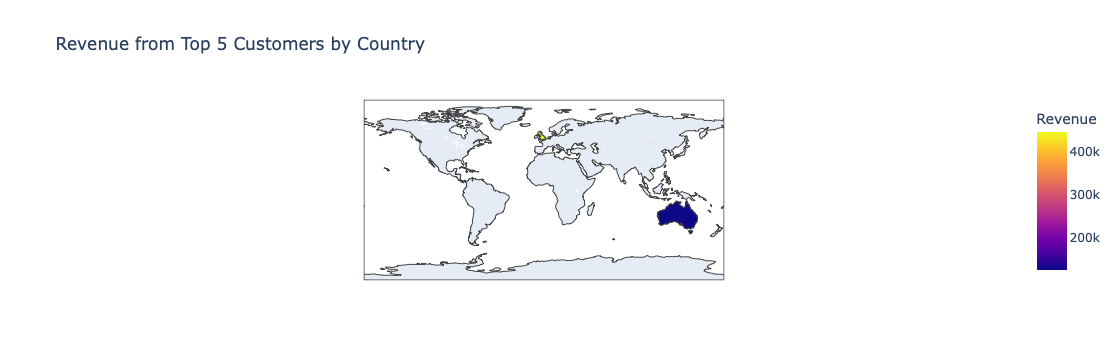

In [607]:
fig = px.choropleth(
    top5_country,
    locations="Country",
    locationmode="country names",
    color="Revenue",
    hover_name="Country",
    hover_data={"Revenue": ":,.2f"},
    title="Revenue from Top 5 Customers by Country"
)
fig.show()

As shown in the map, the top 5 customers in terms of revenue are highlighted. The color intensity represents the amount of revenue generated, with brighter colors indicating higher revenue and darker colors indicating lower revenue among the top-revenue customers.

b) In which countries are located my top 50 customers?

In [611]:
top_customers_country = (
    customer_revenue.sort_values("TotalCustomerRevenue", ascending=False)
      .head(50)
      .groupby("Country")["CustomerID"]
      .nunique()
      .sort_values(ascending=False)
      .reset_index(name="Top50Customers")
)
top_customers_country

,Country,Top50Customers
0,United Kingdom,41
1,EIRE,2
2,France,2
3,Australia,1
4,Germany,1
5,Japan,1
6,Netherlands,1
7,Sweden,1


c) What is the revenue distribution per customer?

In [586]:
customer_revenue = df.groupby("CustomerID")["Revenue"].sum().reset_index()

customer_revenue.rename(columns={"Revenue": "TotalCustomerRevenue"}, inplace=True)

customer_revenue.describe()

,CustomerID,TotalCustomerRevenue
count,4372.000000,4372.000000
mean,15299.677722,1898.459701
std,1722.390705,8219.345141
min,12346.000000,-4287.630000
25%,13812.750000,293.362500
50%,15300.500000,648.075000
75%,16778.250000,1611.725000
max,18287.000000,279489.020000


d) What percentage of total revenue is generated by the top 10% of customers?

In [595]:
customer_revenue = customer_revenue.sort_values(by="TotalCustomerRevenue", ascending=False)

customer_revenue["CumulativeRevenue"] = customer_revenue["TotalCustomerRevenue"].cumsum()

total_revenue = customer_revenue["TotalCustomerRevenue"].sum()

customer_revenue["RevenuePercentage"] = (customer_revenue["CumulativeRevenue"] / total_revenue) * 100

top_10_percent_count = int(0.10 * len(customer_revenue))

top_10_percent_revenue = customer_revenue.head(top_10_percent_count)["TotalCustomerRevenue"].sum()

percentage = (top_10_percent_revenue / total_revenue) * 100

print(f"Top 10% customers contribute {percentage:.2f}% of total revenue.")

Top 10% customers contribute 60.01% of total revenue.


The Pareto analysis shows that the top 10% of customers contribute approximately 60% of total revenue. This indicates a high concentration of revenue among a small group of customers. These high-value customers play a critical role in overall business performance and should be prioritized for retention and targeted marketing strategies.

e) How many customers generate 80% of revenue?

In [597]:
customers_80_percent = customer_revenue[customer_revenue["RevenuePercentage"] <= 80]

num_customers_80 = len(customers_80_percent)

print(f"{num_customers_80} customers generate 80% of total revenue.")

1170 customers generate 80% of total revenue.


**ii) Customer Activity (Frequency / transactions)**

a) What is the number of transactions per customer?

In [590]:
customer_transactions = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

customer_transactions.rename(columns={"InvoiceNo": "TransactionCount"}, inplace=True)

customer_transactions.head()

,CustomerID,TransactionCount
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [446]:
average_transactions = customer_transactions["TransactionCount"].mean()

print(f"Average transactions per customer: {average_transactions:.2f}")

Average transactions per customer: 5.08


b) Who are the most frequent customers?

In [599]:
most_frequent_customers = customer_transactions.sort_values(
    by="TransactionCount", ascending=False)

most_frequent_customers.head(10)

,CustomerID,TransactionCount
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
2192,15311.0,118
487,12971.0,89
1615,14527.0,86
803,13408.0,81
1703,14646.0,77


**iii) Customer Retention (Repeat vs one-time)**

a) What is the number of repeat customers VS one time?

In [601]:
one_time_customers = customer_transactions[customer_transactions["TransactionCount"] == 1]

repeat_customers = customer_transactions[customer_transactions["TransactionCount"] > 1]

print(f"One-time customers: {len(one_time_customers)}")
print(f"Repeat customers: {len(repeat_customers)}")

One-time customers: 1313
Repeat customers: 3059


b) What is the percentage of the repeat customers?

In [453]:
repeat_rate = len(repeat_customers) / len(customer_transactions)

print(f"Repeat customer rate: {repeat_rate:.2%}")

Repeat customer rate: 69.97%


**iv) Customer Segmentation**

In [603]:
# Create customer segments based on revenue quantiles to identify low-value and high-value customers
cust["RevenueTier"] = pd.qcut(
    cust["TotalRevenue"],
    q=[0, 0.50, 0.80, 0.95, 1.00],
    labels=["Bronze (Bottom 50%)", "Silver (50-80%)", "Gold (80-95%)", "Platinum (Top 5%)"])

segment_summary = (
    cust.groupby("RevenueTier")
        .agg(
            Customers=("CustomerID", "nunique"),
            TotalRevenue=("TotalRevenue", "sum"),
            AvgRevenue=("TotalRevenue", "mean"),
            AvgTransactions=("Transactions", "mean"),
            AvgAOV=("AvgRevenuePerTransaction", "mean"),
        )
        .reset_index())

segment_summary["RevenueShare"] = segment_summary["TotalRevenue"] / segment_summary["TotalRevenue"].sum()
segment_summary.sort_values("RevenueTier")

,RevenueTier,Customers,TotalRevenue,AvgRevenue,AvgTransactions,AvgAOV,RevenueShare
0,Bronze (Bottom 50%),2186,651982.162,298.253505,1.784081,196.195276,0.078551
1,Silver (50-80%),1311,1518727.811,1158.449894,4.461480,353.301465,0.182978
2,Gold (80-95%),656,2096286.131,3195.558127,9.635671,472.889849,0.252563
3,Platinum (Top 5%),219,4033069.710,18415.843425,27.945205,816.280467,0.485908


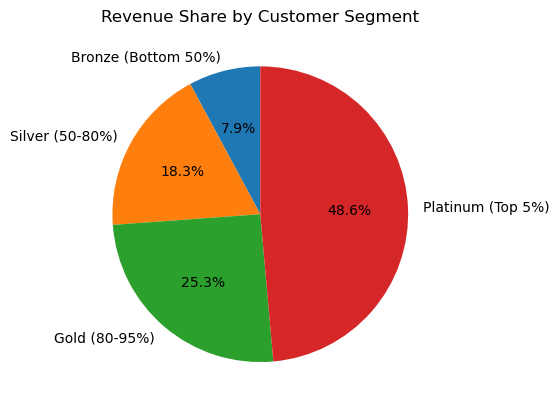

In [456]:
revenue_per_segment = (
    cust.groupby("RevenueTier")["TotalRevenue"]
        .sum()
        .sort_index()
)

plt.figure()

plt.pie(
    revenue_per_segment,
    labels=revenue_per_segment.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Revenue Share by Customer Segment")

plt.show()

The revenue distribution is highly concentrated among the top customer segments. Platinum customers (top 5%) generate nearly half of the total revenue, while Gold customers (80–95%) also contribute a significant share. In contrast, Bronze customers, despite representing 50% of the customer base, contribute only a small portion of total revenue. This indicates that a small proportion of high-value customers drives the majority of the company's revenue.

## Category C: Product Performance Analysis

## Key Product Performance Metrics Summary

Total Unique Products Sold: 4,609

Average Revenue per Product: $2,034.17

Median Revenue per Product: $406.06

Most Sold Product by Quantity: PAPER CRAFT , LITTLE BIRDIE	

Revenue Distribution: Strongly right-skewed, indicating that most products generate relatively low revenue

Revenue Concentration: A small proportion of products contributes disproportionately to total revenue

Business Insight: Overall product performance is heavily dependent on a limited number of high-revenue products

In [641]:
# Remove non-product entries such as postage, fees, discounts, and adjustments

exclude_keywords = ["POST", "DOT", "AMAZONFEE", "Manual", "Discount", "Charges", "Adjust", "Commission"]

product_df = df[
    ~df["Description"].str.contains("|".join(exclude_keywords), case=False, na=False)]

In [645]:
product_revenue = (
    product_df.groupby(["StockCode", "Description"])["Revenue"]
    .sum()
    .reset_index())

a) What are the top 10 products sold? 

In [676]:
product_revenue = (
    product_df.groupby(["StockCode", "Description"])["Revenue"]
    .sum()
    .reset_index())
product_revenue.head()

,StockCode,Description,Revenue
0,10002,INFLATABLE POLITICAL GLOBE,759.89
1,10080,GROOVY CACTUS INFLATABLE,119.09
2,10080,check,0.00
3,10120,DOGGY RUBBER,40.53
4,10123C,HEARTS WRAPPING TAPE,3.25


b) What are the bottom 10 products by revenue? 

In [678]:
bottom_10_products = (
    product_revenue[product_revenue["Revenue"] > 0]
        .sort_values(by="Revenue", ascending=True)
        .head(10)
)
bottom_10_products.tail()

,StockCode,Description,Revenue
543,21268,VINTAGE BLUE TINSEL REEL,0.84
4354,90084,PINK CRYSTAL GUITAR PHONE CHARM,0.85
3479,84201C,HAPPY BIRTHDAY CARD TEDDY/CAKE,0.95
3481,84206B,CAT WITH SUNGLASSES BLANK CARD,0.95
3322,72815,3 WICK CHRISTMAS BRIAR CANDLE,0.97


c) What are the top 10 products in terms of quantity sold?

In [660]:
product_quantity = (
    product_df[product_df["Quantity"] > 0]
        .groupby(["StockCode", "Description"])["Quantity"]
        .sum()
        .reset_index()
)

top_quantity_products = product_quantity.sort_values(
    by="Quantity", ascending=False
).head(10)

top_quantity_products

,StockCode,Description,Quantity
2680,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2128,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
3157,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3645,85099B,JUMBO BAG RED RETROSPOT,48478
3668,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
1128,22197,POPCORN HOLDER,36761
3448,84879,ASSORTED COLOUR BIRD ORNAMENT,36461
456,21212,PACK OF 72 RETROSPOT CAKE CASES,36419
2027,23084,RABBIT NIGHT LIGHT,30788
1388,22492,MINI PAINT SET VINTAGE,26633


d) What is the average revenue per product?

In [664]:
average_revenue_per_product = product_revenue["Revenue"].mean()

print(f"Average revenue per product: ${average_revenue_per_product:,.2f}")

Average revenue per product: $2,025.95


e) What is the distribution of product revenue?

In [666]:
positive_product_revenue = product_revenue[product_revenue["Revenue"] > 0]

positive_product_revenue["Revenue"].describe()

count      4041.000000
mean       2366.367323
std        6039.693368
min           0.003000
25%         109.960000
50%         608.690000
75%        2075.350000
max      164762.190000
Name: Revenue, dtype: float64

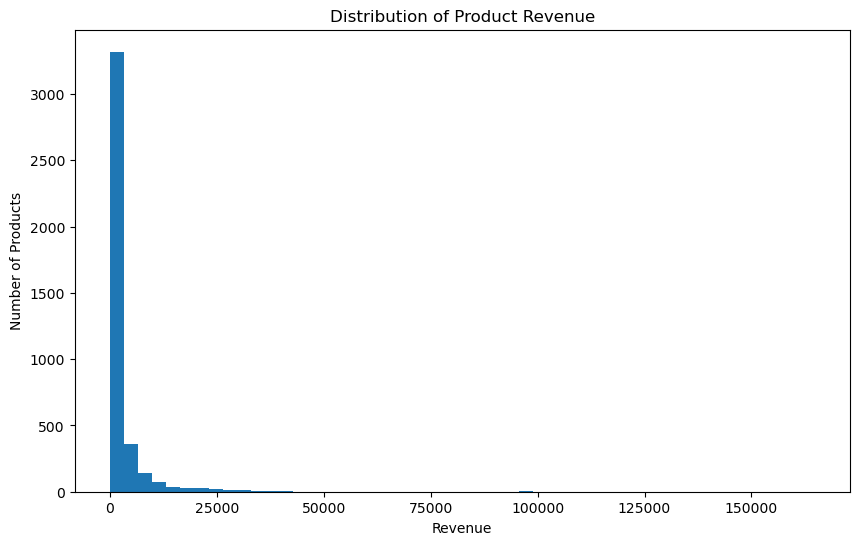

In [672]:
positive_product_revenue = product_revenue[product_revenue["Revenue"] > 0]
plt.figure(figsize=(10,6))
plt.hist(positive_product_revenue["Revenue"], bins=50)
plt.title("Distribution of Product Revenue")
plt.xlabel("Revenue")
plt.ylabel("Number of Products")
plt.show()

The distribution of product revenue is highly right-skewed, indicating that most products generate relatively low revenue, while a small number of products contribute disproportionately high revenue. This suggests that business performance relies heavily on a limited number of high-performing products.

## Category D: Time based behavioral analysis

## Key Time-Based Performance Insights

Peak Sales Hour: 12:00 (Noon) with revenue of $1,362,484.29

Revenue Pattern by Hour: Revenue increases sharply during the morning, peaks around midday, and declines steadily in the late afternoon and evening

Highest Revenue Day of Week: Thursday ($2,112,519.00)

Lowest Revenue Day of Week: Sunday ($805,678.89)

Weekly Trend: Revenue is strongest midweek (Tuesday–Thursday) and weakens toward the weekend

Highest Revenue Month: November ($1,461,756.25)

Lowest Revenue Month: February ($498,062.65)

Seasonal Trend: Revenue shows an overall upward trend throughout the year, with strong growth in Q4

a) What is the revenue by hour?

In [727]:
df["DateTime"] = pd.to_datetime(
    df["Date"].astype(str) + " " + df["Time"].astype(str),
    errors="coerce"
)
df = df.dropna(subset=["DateTime"])

In [732]:
sales_only = df[df["Revenue"] > 0].copy()

revenue_by_hour = (
    sales_only.groupby("Hour")["Revenue"]
    .sum()
    .reindex(range(24), fill_value=0)
    .reset_index())

revenue_by_hour["Revenue"] = revenue_by_hour["Revenue"].round(2)

print("Revenue by Hour:")
revenue_by_hour

Revenue by Hour:


,Hour,Revenue
0,0,0.00
1,1,0.00
2,2,0.00
3,3,0.00
4,4,0.00
5,5,0.00
6,6,4.25
7,7,31059.21
8,8,283868.52
9,9,990267.82


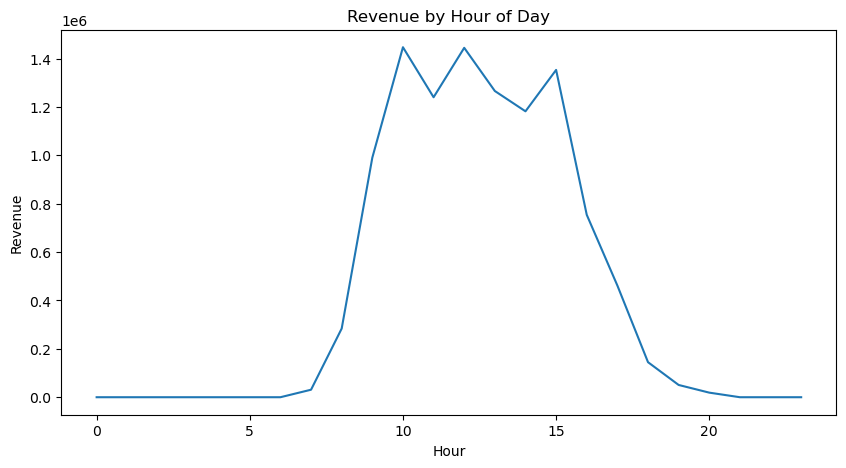

In [734]:
plt.figure(figsize=(10,5))
plt.plot(revenue_by_hour["Hour"], revenue_by_hour["Revenue"])
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()

Revenue varies significantly throughout the day, with the highest levels occurring between late morning and early afternoon, peaking around midday. This indicates that customer purchasing activity is concentrated during standard business hours. Revenue declines sharply in the late afternoon and remains low in the early morning and evening, suggesting lower customer engagement outside peak hours.

b) What is the revenue made by day?

In [740]:
sales_only["DayOfWeek"] = sales_only["DateTime"].dt.day_name()

revenue_by_day = (
    sales_only.groupby("DayOfWeek")["Revenue"]
    .sum()
    .reset_index()
)


order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

revenue_by_day["DayOfWeek"] = pd.Categorical(
    revenue_by_day["DayOfWeek"],
    categories=order,
    ordered=True
)

revenue_by_day = revenue_by_day.sort_values("DayOfWeek")
revenue_by_day

,DayOfWeek,Revenue
1,Monday,1779575.041
4,Tuesday,2178632.611
5,Wednesday,1851147.810
3,Thursday,2203161.240
0,Friday,1840340.231
2,Sunday,813827.611


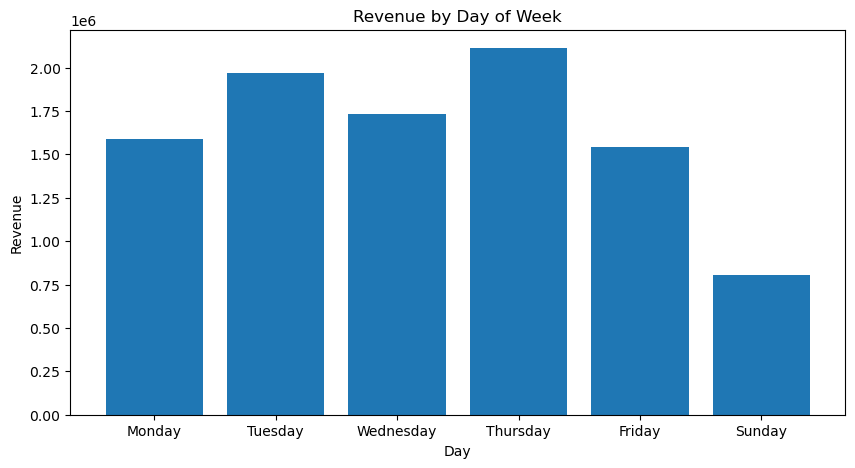

In [479]:
plt.figure(figsize=(10,5))
plt.bar(revenue_by_day["DayOfWeek"], revenue_by_day["Revenue"])
plt.title("Revenue by Day of Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

Revenue varies across the days of the week, with Thursday generating the highest revenue, followed by Tuesday and Wednesday. Revenue declines toward the end of the week, with Sunday showing the lowest performance. This suggests that customer purchasing activity is stronger during midweek and weaker toward the weekend.

c) What is the day with the highest revenue?

In [691]:
peak_day = revenue_by_day.loc[revenue_by_day["Revenue"].idxmax()]

print(f"Peak sales day: {peak_day['DayOfWeek']} with revenue {peak_day['Revenue']:.2f}")

Peak sales day: Thursday with revenue 2112519.00


d) What is the revenue made by month?

In [746]:
sales_only["Month"] = sales_only["DateTime"].dt.month_name()

revenue_by_month = (
    sales_only.groupby("Month")["Revenue"]
    .sum()
    .reset_index())

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"]

revenue_by_month["Month"] = pd.Categorical(
    revenue_by_month["Month"],
    categories=month_order,
    ordered=True)

revenue_by_month = revenue_by_month.sort_values("Month")

revenue_by_month["Revenue"] = revenue_by_month["Revenue"].round(2)

revenue_by_month

,Month,Revenue
4,January,691364.56
3,February,523631.89
7,March,717639.36
0,April,537808.62
8,May,770536.02
6,June,761739.90
5,July,719221.19
1,August,759138.38
11,September,1058590.17
10,October,1154979.30


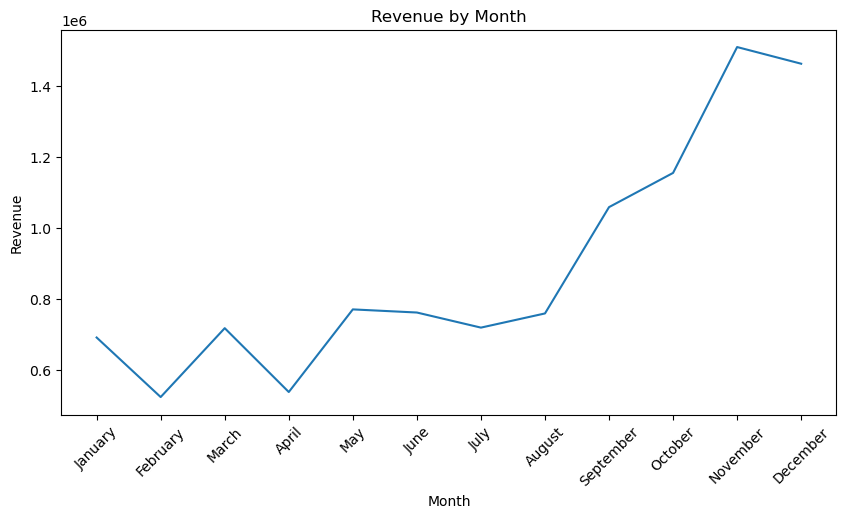

In [748]:
plt.figure(figsize=(10,5))
plt.plot(revenue_by_month["Month"], revenue_by_month["Revenue"])
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

Revenue shows an overall upward trend throughout the year, with moderate fluctuations in the first half and strong growth in the later months. The highest revenue is observed in November, followed by a slight decline in December. This pattern suggests increased customer purchasing activity toward the end of the year, likely driven by seasonal factors such as holiday demand.

e) What is the peak sales hour?

In [700]:
peak_hour = revenue_by_hour.loc[revenue_by_hour["Revenue"].idxmax()]

print(f"Peak sales hour: {peak_hour['Hour']} with revenue {peak_hour['Revenue']:.2f}")

Peak sales hour: 12.0 with revenue 1362484.29


# Final Summary

Key findings:

• Revenue peaks at 12 PM, indicating strongest customer activity during midday.

• Thursday is the highest performing day, suggesting midweek demand is strongest.

• Revenue increases significantly in November and December, indicating seasonal demand.

• Revenue distribution is highly skewed, with a small number of products generating most revenue.

• High-value customers contribute disproportionately to total revenue.

Business implication:
The company should focus marketing and promotions during peak hours and peak months.